 Table of Contents
* [1a. Periodic Boundary Conditions](#Problem-1a:-Periodic-Boundary-Conditions)
	* [Overlayed Plots](#1a.-Overlayed-Plots)
	* [Error Calculations](#1a.-Error-Calculations)
* [1b. Fixed Boundary Conditions](#Problem-1b:-Fixed-Boundary-Conditions)
    * [Overlayed Plots](#1b.-Overlayed-Plots)
	* [Error Calculations](#1b.-Error-Calculations)
* [1c. T-shaped Domain](#Problem-1c:-T-shaped-Domain)
    * [Overlayed Plots](#1c.-Overlayed-Plots)
	* [Error Calculations](#1c.-Error-Calculations)
* [1d. Spherical Domain](#Problem-1d:-Spherical-Domain)
    * [Overlayed Plots](#1d.-Overlayed-Plots)
	* [Error Calculations](#1d.-Error-Calculations)

## Free Energy Plots, varying Grid Sizes

## Problem 1a: Periodic Boundary Conditions

The following cell plots the free energy of the system from benchmark problem 1a as a function  of time, for a particular grid size and spacing: a side length of 200, with a spacing of 0.5.

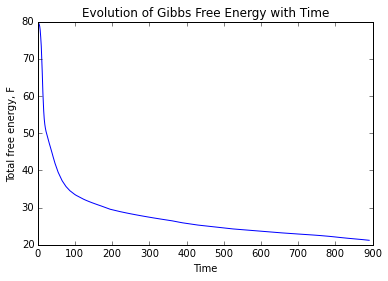

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)
plt.xlabel('Time')
plt.ylabel('Total free energy, F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.loadtxt('1a100x2.0.txt', usecols = [0]), np.loadtxt('1a100x2.0.txt', usecols = [1]))
plt.show()

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 600

# load and cut off values at given duration
times = np.loadtxt('1a50x4.0.txt', usecols = [0])
times50x4 = times[times < duration]
vals = np.loadtxt('1a50x4.0.txt', usecols = [1])
vals50x4 = vals[times < duration]

times = np.loadtxt('1a100x2.0.txt', usecols = [0])
times100x2 = times[times < duration]
vals = np.loadtxt('1a100x2.0.txt', usecols = [1])
vals100x2 = vals[times < duration]

times = np.loadtxt('1a200x1.0.txt', usecols = [0])
times200x1 = times[times < duration]
vals = np.loadtxt('1a200x1.0.txt', usecols = [1])
vals200x1 = vals[times < duration]

times = np.loadtxt('1a400x0.5.txt', usecols = [0])
times400x5 = times[times < duration]
vals = np.loadtxt('1a400x0.5.txt', usecols = [1])
vals400x5= vals[times < duration]

times = np.load('1a75.npz')['time']
times75 = times[times < duration]
vals = np.load('1a75.npz')['f']
vals75 = vals[times < duration]

# times = np.load('1a150.npz')['time']
# times150 = times[times < duration]
# vals = np.load('1a150.npz')['f']
# vals150 = vals[times < duration]

## 1a. Overlayed Plots

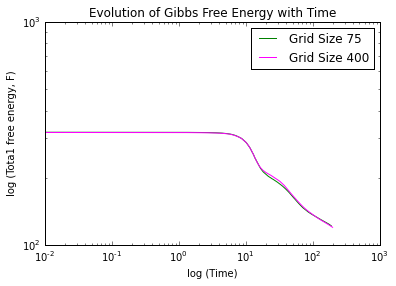

In [32]:
plt.figure(2)
plt.xlabel('log (Time)')
plt.ylabel('log (Tota1 free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, 16.0*vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times75, vals75, 'g', label = 'Grid Size 75')
plt.loglog(times100x2, 4.0*vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, 0.25*vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Here, the free energy data from the FiPy runs for various grid sizes is plotted alongside data from a Moose run using the conservative "IterationAdaptive" time stepper.

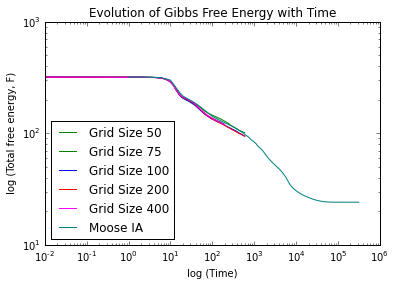

In [23]:
plt.figure(3)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, 16.0*vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times75, vals75, 'g', label = 'Grid Size 75')
plt.loglog(times100x2, 4.0*vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, 0.25*vals400x5, 'magenta', label = 'Grid Size 400')

import pandas as pd
df1 = pd.read_csv("hackathon_p1_square_PBC_IA.csv")['time']
df2 = pd.read_csv("hackathon_p1_square_PBC_IA.csv")['TotalEnergy']
plt.loglog(df1, df2, 'teal', label = 'Moose IA')
plt.legend(loc='best')
plt.show()

Interpolation so that error values are calculated at the same time steps for each run:

In [24]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (180):
    ideal_times.append(i)

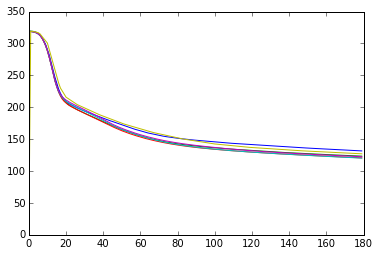

In [25]:
df1cut = df1[df1 < duration]
df2cut = df2[df1 < duration]

f50x4 = interp1d(times50x4, vals50x4)
f75 = interp1d(times75, vals75)
f100x2 = interp1d(times100x2, vals100x2)
f200x1 = interp1d(times200x1, vals200x1)
f400x5 = interp1d(times400x5, vals400x5)
fmoose = interp1d(df1, df2)

y50x4 = 16*f50x4(ideal_times)
y75 = f75(ideal_times)
y100x2 = 4*f100x2(ideal_times)
y200x1 = f200x1(ideal_times)
y400x5 = .25*f400x5(ideal_times)
ymoose = fmoose(ideal_times)
# plot of interpolated free energies
plt.plot(ideal_times, y50x4, ideal_times, y75, ideal_times, y100x2, ideal_times, y200x1, ideal_times, y400x5, ideal_times, ymoose)
plt.show()

## 1a. Error Calculations

In [26]:
import numpy as np

diff_50 = np.absolute(y50x4-y400x5)
diff_75 = np.absolute(y75-y400x5)
diff_100 = np.absolute(y100x2-y400x5)
diff_200 = np.absolute(y200x1-y400x5)
diff_moose = np.absolute(ymoose-y400x5)

In [27]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "75 grid size: {:0,.2f}".format(np.linalg.norm(diff_75, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 1,211.12
75 grid size: 261.48
100 grid size: 501.18
200 grid size: 352.88
Moose: 1,394.51


In [28]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "75 grid size: {:0,.2f}".format(np.linalg.norm(diff_75, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 99.68
75 grid size: 27.35
100 grid size: 41.35
200 grid size: 27.56
Moose: 330.81


In [29]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "75 grid size: {:0,.2f}".format(np.linalg.norm(diff_75, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 9.71
75 grid size: 5.52
100 grid size: 5.67
200 grid size: 2.70
Moose: 319.10


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

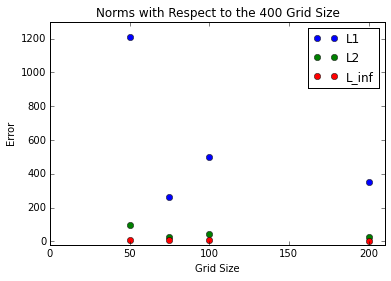

In [31]:
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_75, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_75, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 1300)
plt.show()

## Problem 1b: Fixed Boundary Conditions

The following cell plots the free energy of the system from benchmark problem 1b as a function  of time, for a particular grid size and spacing: a side length of 200, with a spacing of 4.0.

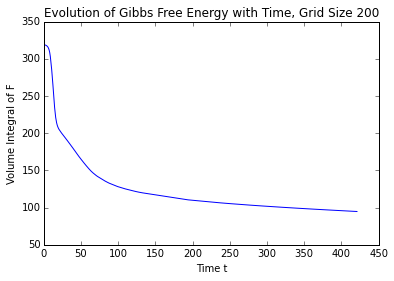

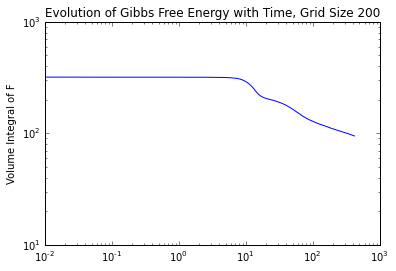

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time, Grid Size 200')
plt.plot(np.load('1b200/1b200.npz')['time'], np.load('1b200/1b200.npz')['f'])
plt.show()
plt.figure(2)
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time, Grid Size 200')
plt.loglog(np.load('1b200/1b200.npz')['time'], np.load('1b200/1b200.npz')['f'])
plt.show()

## 1b. Overlayed Plots 

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 180

# load and cut off values at given duration
times = np.load('1b50/1b50.npz')['time']
times50x4 = times[times < duration]
vals = np.load('1b50/1b50.npz')['f']
vals50x4 = vals[times < duration]

# times = np.load('1b75/1b75.npz')['time']
# times75 = times[times < duration]
# vals = np.load('1b75/1b75.npz')['f']
# vals75 = vals[times < duration]

times = np.load('1b100/1b100.npz')['time']
times100x2 = times[times < duration]
vals = np.load('1b100/1b100.npz')['f']
vals100x2 = vals[times < duration]

times = np.load('1b200/1b200.npz')['time']
times200x1 = times[times < duration]
vals = np.load('1b200/1b200.npz')['f']
vals200x1 = vals[times < duration]

times = np.load('1b400/1b400.npz')['time']
times400x5 = times[times < duration]
vals = np.load('1b400/1b400.npz')['f']
vals400x5= vals[times < duration]

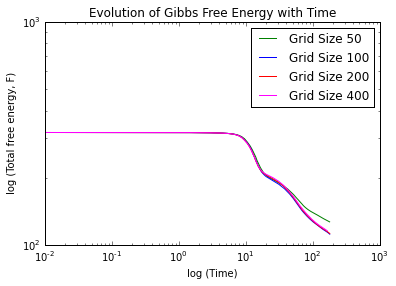

In [14]:
plt.figure(3)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Here, the free energy data from the FiPy runs for various grid sizes is plotted alongside data from a Moose run using the conservative "IterationAdaptive" time stepper.

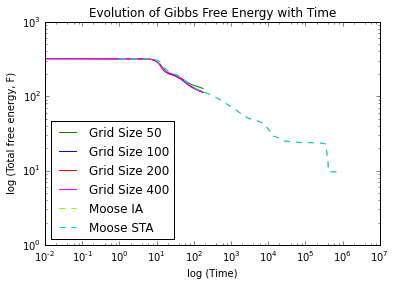

In [15]:
plt.figure(3)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')

import pandas as pd
df1_IA = pd.read_csv("hackathon_p1_square_NF_IA.csv")['time']
df2_IA = pd.read_csv("hackathon_p1_square_NF_IA.csv")['TotalEnergy']
plt.loglog(df1_IA, df2_IA, linestyle = '--', color = 'chartreuse', label = 'Moose IA')
df1_STA = pd.read_csv("hackathon_p1_square_NF_STA.csv")['time']
df2_STA = pd.read_csv("hackathon_p1_square_NF_STA.csv")['TotalEnergy']
plt.loglog(df1_STA, df2_STA, linestyle = '--', color = 'deepskyblue', label = 'Moose STA')
plt.legend(loc='best')
plt.show()

Interpolation so that error values are calculated at the same time steps for each run:

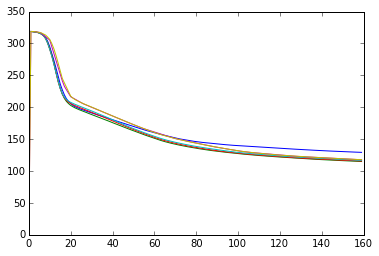

In [16]:
from scipy.interpolate import interp1d
ideal_times = []
for i in range (160):
    ideal_times.append(i)
    
f50x4 = interp1d(times50x4, vals50x4)
f75 = interp1d(times75, vals75)
f100x2 = interp1d(times100x2, vals100x2)
f200x1 = interp1d(times200x1, vals200x1)
f400x5 = interp1d(times400x5, vals400x5)
fmooseIA = interp1d(df1_IA, df2_IA)
fmooseSTA = interp1d(df1_STA, df2_STA)


y50x4 = f50x4(ideal_times)
y75 = f75(ideal_times)
y100x2 = f100x2(ideal_times)
y200x1 = f200x1(ideal_times)
y400x5 = f400x5(ideal_times)
ymooseIA = fmooseIA(ideal_times)
ymooseSTA = fmooseSTA(ideal_times)
# plot of interpolated free energies
plt.plot(ideal_times, y50x4, ideal_times, y100x2, ideal_times, y200x1, ideal_times, y400x5, ideal_times, ymooseIA, ideal_times, ymooseSTA)
plt.show()

## 1b. Error Calculations

In [19]:
import numpy as np

diff_50 = np.absolute(y50x4 - y400x5)
diff_75 = np.absolute(y75 - y400x5)
diff_100 = np.absolute(y100x2 - y400x5)
diff_200 = np.absolute(y200x1 - y400x5)
diff_mooseIA = np.absolute(ymooseIA - y400x5)
diff_mooseSTA = np.absolute(ymooseSTA - y400x5)

In [20]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
print "Moose (IA): {:0,.2f}".format(np.linalg.norm(diff_mooseIA, 1))
print "Moose (STA): {:0,.2f}".format(np.linalg.norm(diff_mooseSTA, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 1,200.64
100 grid size: 415.56
200 grid size: 209.47
Moose (IA): 1,044.67
Moose (STA): 1,094.91


In [43]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))
print "Moose (IA): {:0,.2f}".format(np.linalg.norm(diff_mooseIA, 2))
print "Moose (STA): {:0,.2f}".format(np.linalg.norm(diff_mooseSTA, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 108.95
100 grid size: 37.38
200 grid size: 17.69
Moose (IA): 328.40
Moose (STA): 331.49


In [44]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
print "Moose (IA): {:0,.2f}".format(np.linalg.norm(diff_mooseIA, np.inf))
print "Moose (STA): {:0,.2f}".format(np.linalg.norm(diff_mooseSTA, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 12.61
100 grid size: 5.90
200 grid size: 2.11
Moose (IA): 319.04
Moose (STA): 319.04


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

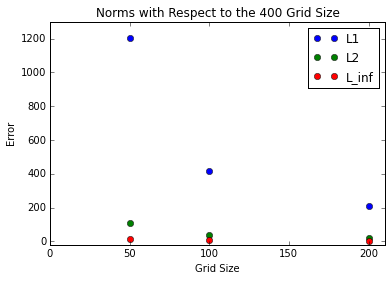

In [35]:
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 1300)
plt.show()

## Problem 1c: T-shaped Domain

The following cell plots the free energy of the system from benchmark problem 1a as a function  of time, for a particular grid size and spacing: a side length of 200, with a spacing of 0.5.

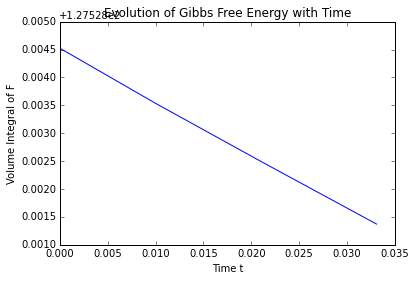

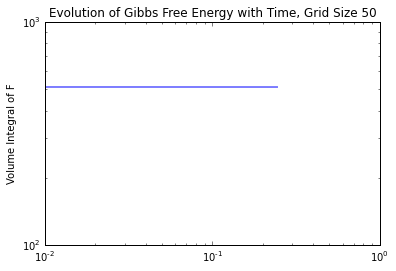

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(6)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.load('1c200/1c200.npz')['time'], np.load('1c200/1c200.npz')['f'])

plt.show()
plt.figure(2)
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time, Grid Size 50')
plt.loglog(np.load('1c200/1c200.npz')['time'], np.load('1c200/1c200.npz')['f'])
plt.show()

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 170

# load and cut off values at given duration
times = np.load('1c50/1c50.npz')['time']
times50x4 = times[times < duration]
vals = np.load('1c50/1c50.npz')['f']
vals50x4 = vals[times < duration]

times = np.load('1c75/1c75.npz')['time']
times50x4 = times[times < duration]
vals = np.load('1c75/1c75.npz')['f']
vals50x4 = vals[times < duration]

times = np.load('1c100/1c100.npz')['time']
times100x2 = times[times < duration]
vals = np.load('1c100/1c100.npz')['f']
vals100x2 = vals[times < duration]

times = np.load('1c200/1c200.npz')['time']
times200x1 = times[times < duration]
vals = np.load('1c200/1c200.npz')['f']
vals200x1 = vals[times < duration]

times = np.load('1c400/1c400.npz')['time']
times400x5 = times[times < duration]
vals = np.load('1c400/1c400.npz')['f']
vals400x5= vals[times < duration]

IOError: [Errno 22] Invalid argument

## 1c. Overlayed Plots

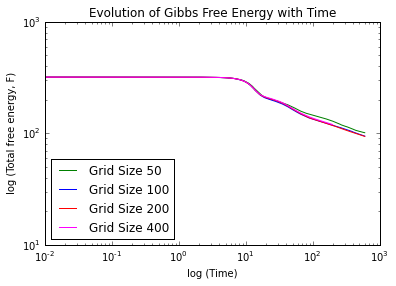

In [16]:
plt.figure(2)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Here, the free energy data from the FiPy runs for various grid sizes is plotted alongside data from a Moose run using the conservative "IterationAdaptive" time stepper.

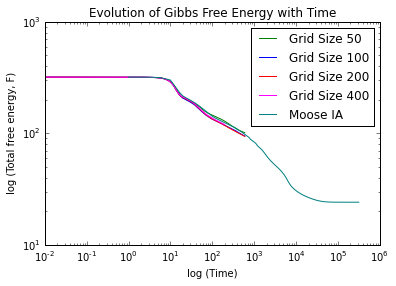

In [17]:
plt.figure(3)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, 16.0*vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, 4.0*vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, 0.25*vals400x5, 'magenta', label = 'Grid Size 400')

import pandas as pd
df1 = pd.read_csv("hackathon_p1_square_PBC_IA.csv")['time']
df2 = pd.read_csv("hackathon_p1_square_PBC_IA.csv")['TotalEnergy']
plt.loglog(df1, df2, 'teal', label = 'Moose IA')
plt.legend(loc='best')
plt.show()

Interpolation so that error values are calculated at the same time steps for each run:

In [19]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (180):
    ideal_times.append(i)

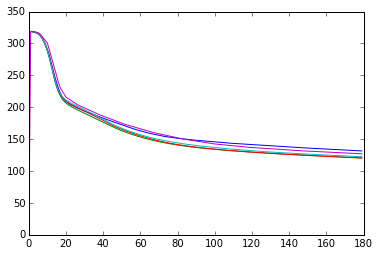

In [20]:
df1cut = df1[df1 < duration]
df2cut = df2[df1 < duration]

f50x4 = interp1d(times50x4, vals50x4)
f75 = interp1d(times75, vals75)
f100x2 = interp1d(times100x2, vals100x2)
f200x1 = interp1d(times200x1, vals200x1)
f400x5 = interp1d(times400x5, vals400x5)
fmoose = interp1d(df1, df2)

y50x4 = 16*f50x4(ideal_times)
y75 = f75(ideal_times)
y100x2 = 4*f100x2(ideal_times)
y200x1 = f200x1(ideal_times)
y400x5 = .25*f400x5(ideal_times)
ymoose = fmoose(ideal_times)
# plot of interpolated free energies
plt.plot(ideal_times, y50x4, ideal_times, y100x2, ideal_times, y200x1, ideal_times, y400x5, ideal_times, ymoose)
plt.show()

## 1c. Error Calculations

In [23]:
import numpy as np

diff_50 = np.absolute(y50x4-y400x5)
diff_75 = np.absolute(y75-y400x5)
diff_100 = np.absolute(y100x2-y400x5)
diff_200 = np.absolute(y200x1-y400x5)
diff_moose = np.absolute(ymoose-y400x5)

In [25]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 1,211.12
100 grid size: 501.18
200 grid size: 352.88
Moose: 1,394.51


In [26]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 99.68
100 grid size: 41.35
200 grid size: 27.56
Moose: 330.81


In [27]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 9.71
100 grid size: 5.67
200 grid size: 2.70
Moose: 319.10


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

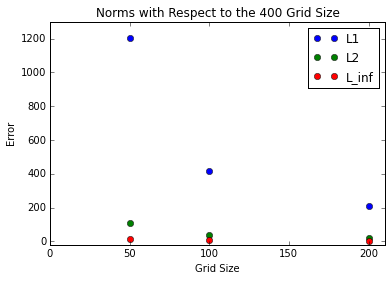

In [36]:
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 75, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_75, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_75, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_75, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 1300)
plt.show()

## Problem 1d: Spherical Domain

The following cell plots the free energy of the system from benchmark problem 1a as a function  of time, for a particular grid size and spacing: a side length of 200, with a spacing of 0.5.

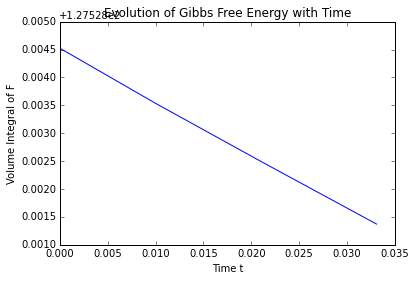

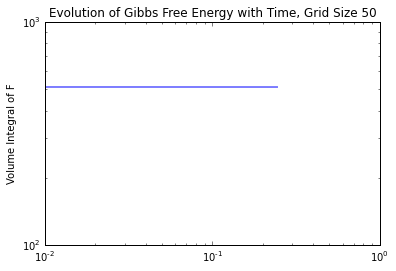

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(6)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.load('1d200/1d200.npz')['time'], np.load('1d200/1d200.npz')['f'])

plt.show()
plt.figure(2)
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time, Grid Size 50')
plt.loglog(np.load('1d200/1d200.npz')['time'], np.load('1d200/1d200.npz')['f'])
plt.show()

This next plot overlays free energy curves for the same problem, for various grid sizes.
The maximum time to which the data is plotted is controlled by the "duration" variable below. This was necessary since some grid sizes were run to different durations than others.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

duration = 170

# load and cut off values at given duration
times = np.load('1d50/1d50.npz')['time']
times50x4 = times[times < duration]
vals = np.load('1d50/1d50.npz')['f']
vals50x4 = vals[times < duration]



times = np.load('1d100/1d100.npz')['time']
times100x2 = times[times < duration]
vals = np.load('1d100/1d100.npz')['f']
vals100x2 = vals[times < duration]

times = np.load('1d200/1d200.npz')['time']
times200x1 = times[times < duration]
vals = np.load('1d200/1d200.npz')['f']
vals200x1 = vals[times < duration]

times = np.load('1d400/1d400.npz')['time']
times400x5 = times[times < duration]
vals = np.load('1d400/1d400.npz')['f']
vals400x5= vals[times < duration]

IOError: [Errno 22] Invalid argument

## 1d. Overlayed Plots

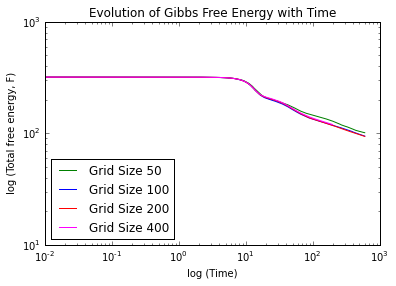

In [16]:
plt.figure(2)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

Here, the free energy data from the FiPy runs for various grid sizes is plotted alongside data from a Moose run using the conservative "IterationAdaptive" time stepper.

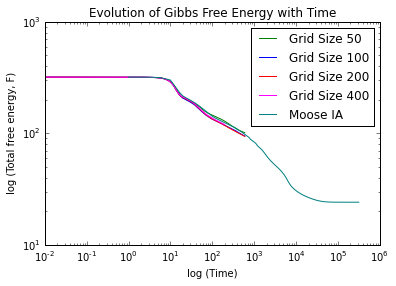

In [17]:
plt.figure(3)
plt.xlabel('log (Time)')
plt.ylabel('log (Total free energy, F)')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.loglog(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.loglog(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.loglog(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.loglog(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')

import pandas as pd
df1 = pd.read_csv("hackathon_p1_square_PBC_IA.csv")['time']
df2 = pd.read_csv("hackathon_p1_square_PBC_IA.csv")['TotalEnergy']
plt.loglog(df1, df2, 'teal', label = 'Moose IA')
plt.legend(loc='best')
plt.show()

Interpolation so that error values are calculated at the same time steps for each run:

In [19]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (180):
    ideal_times.append(i)

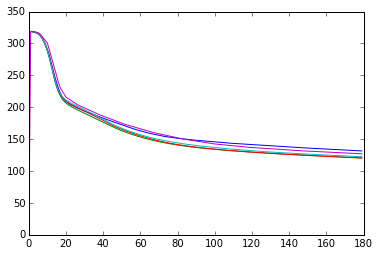

In [20]:
df1cut = df1[df1 < duration]
df2cut = df2[df1 < duration]

f50x4 = interp1d(times50x4, vals50x4)
f100x2 = interp1d(times100x2, vals100x2)
f200x1 = interp1d(times200x1, vals200x1)
f400x5 = interp1d(times400x5, vals400x5)
fmoose = interp1d(df1, df2)

y50x4 = 16*f50x4(ideal_times)
y100x2 = 4*f100x2(ideal_times)
y200x1 = f200x1(ideal_times)
y400x5 = .25*f400x5(ideal_times)
ymoose = fmoose(ideal_times)
# plot of interpolated free energies
plt.plot(ideal_times, y50x4, ideal_times, y100x2, ideal_times, y200x1, ideal_times, y400x5, ideal_times, ymoose)
plt.show()

## 1d. Error Calculations

In [23]:
import numpy as np

diff_50 = []
diff_100 = []
diff_200 = []
diff_moose = []

for i in range (180):
    diff_50.append(np.absolute(y50x4[i]-y400x5[i]))
    diff_100.append(np.absolute(y100x2[i]-y400x5[i]))
    diff_200.append(np.absolute(y200x1[i]-y400x5[i]))
    diff_moose.append(np.absolute(ymoose[i]-y400x5[i]))

In [25]:
print "L1 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 1))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 1))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 1))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 1))

L1 Norms for error relative to a 400 grid size
50 grid size: 1,211.12
100 grid size: 501.18
200 grid size: 352.88
Moose: 1,394.51


In [26]:
print "L2 Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, 2))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, 2))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, 2))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, 2))

L2 Norms for error relative to a 400 grid size
50 grid size: 99.68
100 grid size: 41.35
200 grid size: 27.56
Moose: 330.81


In [27]:
print "L_inf Norms for error relative to a 400 grid size"
print "50 grid size: {:0,.2f}".format(np.linalg.norm(diff_50, np.inf))
print "100 grid size: {:0,.2f}".format(np.linalg.norm(diff_100, np.inf))
print "200 grid size: {:0,.2f}".format(np.linalg.norm(diff_200, np.inf))
print "Moose: {:0,.2f}".format(np.linalg.norm(diff_moose, np.inf))

L_inf Norms for error relative to a 400 grid size
50 grid size: 9.71
100 grid size: 5.67
200 grid size: 2.70
Moose: 319.10


norms: L1 (|f_100-f_200|), L2 = SUM (f_100-f_200)^2 -->scipy interpolate

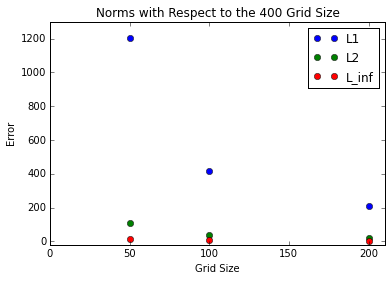

In [36]:
plt.xlabel('Grid Size')
plt.ylabel('Error')
plt.title('Norms with Respect to the 400 Grid Size')

plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 1), np.linalg.norm(diff_100, 1), np.linalg.norm(diff_200, 1)], marker = 'o', linestyle = 'None', label = 'L1')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, 2), np.linalg.norm(diff_100, 2), np.linalg.norm(diff_200, 2)], marker = 'o', linestyle = 'None', label = 'L2')
plt.plot([50, 100, 200], [np.linalg.norm(diff_50, np.inf), np.linalg.norm(diff_100, np.inf), np.linalg.norm(diff_200, np.inf)], marker ='o', linestyle = 'None', label = 'L_inf')
plt.legend(loc='best')
plt.xlim(0, 210)
plt.ylim(-20, 1300)
plt.show()

In [5]:
np.loadtxt('1a50x4.0.txt', usecols = [1])

array([ 19.93991924,  19.93977373,  19.93961304, ...,   3.62729153,
         3.62724293,   3.62719959])

In [8]:
times = np.loadtxt('1a50x4.0.txt', usecols = [0])

In [9]:
times_reduced = times[times < 2000]

In [10]:
times_reduced

array([  0.00000000e+00,   1.00000000e-02,   2.10000000e-02, ...,
         1.99609493e+03,   1.99778186e+03,   1.99963747e+03])

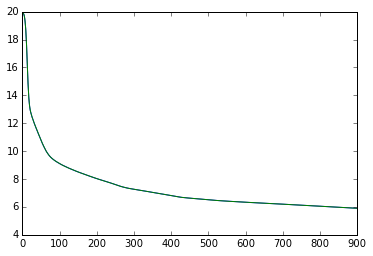

In [39]:
from scipy.interpolate import interp1d

ideal_times = []
for i in range (900):
    ideal_times.append(i)

f = interp1d(times50x4, vals50x4)
y_interp = f(ideal_times)
plt.plot(times50x4, vals50x4)
plt.plot(ideal_times, y_interp)
plt.show()

In [34]:
from scipy.interpolate import interp1d

x = np.array([0., 0.5, 2.0, 2.5])
x_interp = np.array([1.0, 1.5])
y = x**2

f = interp1d(x, y)
y_interp = f(x_interp)

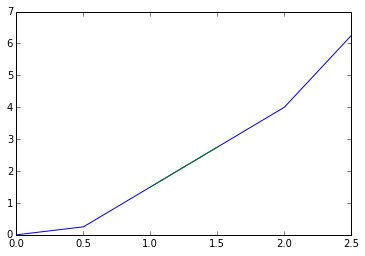

In [35]:
plt.plot(x, y)
plt.plot(x_interp, y_interp)
plt.show()

In [21]:
npz = np.load('1b50/1b50.npz')['time']
print len(npz)

448


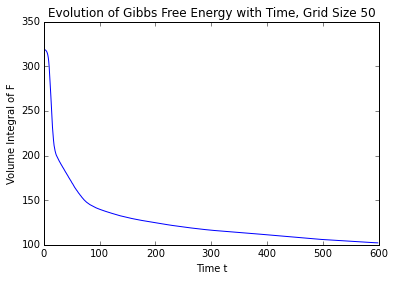

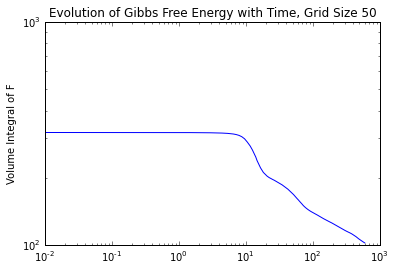

IOError: [Errno 2] No such file or directory: '1c400/1400.npz'

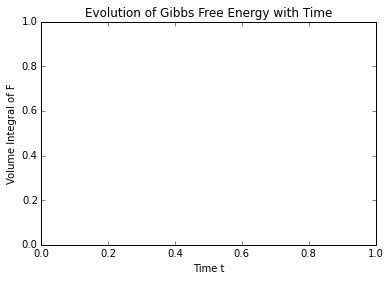

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(2)
plt.xlabel('Time t')
plt.ylabel('Volume Integral of F')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(np.load('1c400/1400.npz')['time'], np.load('1b400/1b400.npz')['f'])
plt.show()
# plt.loglog(np.load('1b50/1b50.npz')['time'], np.load('1b50/1b50.npz')['f'])
# plt.show()

In [ ]:
plt.figure(2)
plt.xlabel('Time t')
plt.ylabel('Volume integral of f')
plt.title('Evolution of Gibbs Free Energy with Time')
plt.plot(times50x4, vals50x4, 'g', label = 'Grid Size 50')
plt.plot(times100x2, vals100x2, 'b', label = 'Grid Size 100')
plt.plot(times200x1, vals200x1, 'r', label = 'Grid Size 200')
plt.plot(times400x5, vals400x5, 'magenta', label = 'Grid Size 400')
plt.legend(loc='best')
plt.show()

In [10]:
import pandas as pd
df1 = pd.read_csv("hackathon_p1_square_PBC_IA.csv")
print df1


              time  TotalEnergy
0         0.000000     0.000000
1         1.000000   319.006170
2         1.140710   318.974826
3         2.999038   318.388759
4         5.000000   317.063126
5         5.661145   316.312551
6        10.000000   300.553919
7        16.607605   231.919549
8        20.000000   215.847537
9        25.804315   204.448183
10       37.458309   188.864110
11       50.000000   174.900840
12       51.393870   173.536617
13       66.259489   160.784719
14       82.333802   150.475195
15       99.276375   142.691968
16      100.000000   142.433957
17      118.011238   137.247625
18      144.016870   132.110167
19      182.745671   126.469619
20      200.000000   124.377471
21      220.387160   122.166171
22      261.365352   118.412718
23      309.354003   114.833806
24      361.393516   110.984225
25      380.321729   109.339533
26      404.498345   108.200832
27      439.740291   106.254343
28      477.890477   104.166202
29      500.000000   103.147752
..      